#### inspired from https://github.com/srnand/Reinforcement-Learning-using-OpenAI-Gym/blob/master/Mountain_Car/sarsa_mountain_car.py

In [1]:
import gym
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def toDiscreteStates(observation, buckets=[20, 20]):
#     quantify the continous state space into discrete space
    interval=[0 for i in range(len(observation))]
    max_range=[1.2,0.07]

    for i in range(len(observation)):
        data = observation[i]
        inter = int(math.floor((data + max_range[i])/(2*max_range[i]/buckets[i])))

        if inter>=buckets[i]:
            interval[i]=buckets[i]-1
        elif inter<0:
            interval[i]=0
        else:
            interval[i]=inter
    return interval

def get_action(observation,t):

    if np.random.random()<max(0.001, min(0.015, 1.0 - math.log10((t+1)/220.))):#get_epsilon(t):
        return env.action_space.sample()
    interval = toDiscreteStates(observation)

    return np.argmax(np.array(Q_table[tuple(interval)]))

def updateQ_SARSA(observation,reward,action,ini_obs,next_action,t):

    interval = toDiscreteStates(observation)

    Q_next = Q_table[tuple(interval)][next_action]

    ini_interval = toDiscreteStates(ini_obs)

    Q_table[tuple(ini_interval)][action]+=max(0.4, min(0.1, 1.0 - math.log10((t+1)/125.)))*(reward + gamma*(Q_next) - Q_table[tuple(ini_interval)][action])

In [3]:
env = gym.make('MountainCar-v0')
# env = gym.wrappers.Monitor(env,'mountaincar')

Q_table = np.zeros((20,20,3))
alpha=0.3
buckets=[20, 20]
gamma=0.99
timesteps=[]
scores=[]
max_score = -201

for i_episode in range(3000):
    observation = env.reset()
    t=0
    score=0

    while (True):

        action = get_action(observation,i_episode)
        observation1, reward, done, info = env.step(action)
        next_action = get_action(observation1,i_episode)
        updateQ_SARSA(observation1,reward,action,observation,next_action,i_episode)
        
        observation=observation1
        action = next_action
        t+=1
        score += reward
        
        if done:
            print("{:3d} Episode finished after {} timesteps | score: {:3f} ".format(i_episode, t+1, score))
            timesteps.append(t+1)
            scores.append(score)
            if score > max_score:
                max_score = score
            break

  0 Episode finished after 201 timesteps | score: -200.000000 
  1 Episode finished after 201 timesteps | score: -200.000000 
  2 Episode finished after 201 timesteps | score: -200.000000 
  3 Episode finished after 201 timesteps | score: -200.000000 
  4 Episode finished after 201 timesteps | score: -200.000000 
  5 Episode finished after 201 timesteps | score: -200.000000 
  6 Episode finished after 201 timesteps | score: -200.000000 
  7 Episode finished after 201 timesteps | score: -200.000000 
  8 Episode finished after 201 timesteps | score: -200.000000 
  9 Episode finished after 201 timesteps | score: -200.000000 
 10 Episode finished after 201 timesteps | score: -200.000000 
 11 Episode finished after 201 timesteps | score: -200.000000 
 12 Episode finished after 201 timesteps | score: -200.000000 
 13 Episode finished after 201 timesteps | score: -200.000000 
 14 Episode finished after 201 timesteps | score: -200.000000 
 15 Episode finished after 201 timesteps | score: -200.

138 Episode finished after 201 timesteps | score: -200.000000 
139 Episode finished after 201 timesteps | score: -200.000000 
140 Episode finished after 201 timesteps | score: -200.000000 
141 Episode finished after 201 timesteps | score: -200.000000 
142 Episode finished after 201 timesteps | score: -200.000000 
143 Episode finished after 201 timesteps | score: -200.000000 
144 Episode finished after 201 timesteps | score: -200.000000 
145 Episode finished after 201 timesteps | score: -200.000000 
146 Episode finished after 201 timesteps | score: -200.000000 
147 Episode finished after 201 timesteps | score: -200.000000 
148 Episode finished after 201 timesteps | score: -200.000000 
149 Episode finished after 201 timesteps | score: -200.000000 
150 Episode finished after 201 timesteps | score: -200.000000 
151 Episode finished after 201 timesteps | score: -200.000000 
152 Episode finished after 201 timesteps | score: -200.000000 
153 Episode finished after 201 timesteps | score: -200.

281 Episode finished after 201 timesteps | score: -200.000000 
282 Episode finished after 201 timesteps | score: -200.000000 
283 Episode finished after 201 timesteps | score: -200.000000 
284 Episode finished after 201 timesteps | score: -200.000000 
285 Episode finished after 201 timesteps | score: -200.000000 
286 Episode finished after 201 timesteps | score: -200.000000 
287 Episode finished after 201 timesteps | score: -200.000000 
288 Episode finished after 201 timesteps | score: -200.000000 
289 Episode finished after 201 timesteps | score: -200.000000 
290 Episode finished after 201 timesteps | score: -200.000000 
291 Episode finished after 201 timesteps | score: -200.000000 
292 Episode finished after 191 timesteps | score: -190.000000 
293 Episode finished after 201 timesteps | score: -200.000000 
294 Episode finished after 201 timesteps | score: -200.000000 
295 Episode finished after 201 timesteps | score: -200.000000 
296 Episode finished after 201 timesteps | score: -200.

415 Episode finished after 201 timesteps | score: -200.000000 
416 Episode finished after 201 timesteps | score: -200.000000 
417 Episode finished after 201 timesteps | score: -200.000000 
418 Episode finished after 201 timesteps | score: -200.000000 
419 Episode finished after 201 timesteps | score: -200.000000 
420 Episode finished after 201 timesteps | score: -200.000000 
421 Episode finished after 201 timesteps | score: -200.000000 
422 Episode finished after 201 timesteps | score: -200.000000 
423 Episode finished after 201 timesteps | score: -200.000000 
424 Episode finished after 201 timesteps | score: -200.000000 
425 Episode finished after 201 timesteps | score: -200.000000 
426 Episode finished after 201 timesteps | score: -200.000000 
427 Episode finished after 201 timesteps | score: -200.000000 
428 Episode finished after 201 timesteps | score: -200.000000 
429 Episode finished after 201 timesteps | score: -200.000000 
430 Episode finished after 201 timesteps | score: -200.

551 Episode finished after 201 timesteps | score: -200.000000 
552 Episode finished after 201 timesteps | score: -200.000000 
553 Episode finished after 201 timesteps | score: -200.000000 
554 Episode finished after 201 timesteps | score: -200.000000 
555 Episode finished after 201 timesteps | score: -200.000000 
556 Episode finished after 201 timesteps | score: -200.000000 
557 Episode finished after 201 timesteps | score: -200.000000 
558 Episode finished after 201 timesteps | score: -200.000000 
559 Episode finished after 201 timesteps | score: -200.000000 
560 Episode finished after 201 timesteps | score: -200.000000 
561 Episode finished after 201 timesteps | score: -200.000000 
562 Episode finished after 200 timesteps | score: -199.000000 
563 Episode finished after 201 timesteps | score: -200.000000 
564 Episode finished after 201 timesteps | score: -200.000000 
565 Episode finished after 201 timesteps | score: -200.000000 
566 Episode finished after 201 timesteps | score: -200.

686 Episode finished after 201 timesteps | score: -200.000000 
687 Episode finished after 201 timesteps | score: -200.000000 
688 Episode finished after 201 timesteps | score: -200.000000 
689 Episode finished after 201 timesteps | score: -200.000000 
690 Episode finished after 201 timesteps | score: -200.000000 
691 Episode finished after 201 timesteps | score: -200.000000 
692 Episode finished after 201 timesteps | score: -200.000000 
693 Episode finished after 201 timesteps | score: -200.000000 
694 Episode finished after 201 timesteps | score: -200.000000 
695 Episode finished after 201 timesteps | score: -200.000000 
696 Episode finished after 201 timesteps | score: -200.000000 
697 Episode finished after 201 timesteps | score: -200.000000 
698 Episode finished after 201 timesteps | score: -200.000000 
699 Episode finished after 201 timesteps | score: -200.000000 
700 Episode finished after 201 timesteps | score: -200.000000 
701 Episode finished after 201 timesteps | score: -200.

821 Episode finished after 201 timesteps | score: -200.000000 
822 Episode finished after 201 timesteps | score: -200.000000 
823 Episode finished after 201 timesteps | score: -200.000000 
824 Episode finished after 148 timesteps | score: -147.000000 
825 Episode finished after 138 timesteps | score: -137.000000 
826 Episode finished after 159 timesteps | score: -158.000000 
827 Episode finished after 165 timesteps | score: -164.000000 
828 Episode finished after 165 timesteps | score: -164.000000 
829 Episode finished after 160 timesteps | score: -159.000000 
830 Episode finished after 160 timesteps | score: -159.000000 
831 Episode finished after 157 timesteps | score: -156.000000 
832 Episode finished after 179 timesteps | score: -178.000000 
833 Episode finished after 158 timesteps | score: -157.000000 
834 Episode finished after 167 timesteps | score: -166.000000 
835 Episode finished after 160 timesteps | score: -159.000000 
836 Episode finished after 163 timesteps | score: -162.

960 Episode finished after 201 timesteps | score: -200.000000 
961 Episode finished after 201 timesteps | score: -200.000000 
962 Episode finished after 201 timesteps | score: -200.000000 
963 Episode finished after 201 timesteps | score: -200.000000 
964 Episode finished after 201 timesteps | score: -200.000000 
965 Episode finished after 201 timesteps | score: -200.000000 
966 Episode finished after 201 timesteps | score: -200.000000 
967 Episode finished after 201 timesteps | score: -200.000000 
968 Episode finished after 201 timesteps | score: -200.000000 
969 Episode finished after 201 timesteps | score: -200.000000 
970 Episode finished after 201 timesteps | score: -200.000000 
971 Episode finished after 201 timesteps | score: -200.000000 
972 Episode finished after 201 timesteps | score: -200.000000 
973 Episode finished after 201 timesteps | score: -200.000000 
974 Episode finished after 201 timesteps | score: -200.000000 
975 Episode finished after 201 timesteps | score: -200.

1089 Episode finished after 184 timesteps | score: -183.000000 
1090 Episode finished after 182 timesteps | score: -181.000000 
1091 Episode finished after 201 timesteps | score: -200.000000 
1092 Episode finished after 201 timesteps | score: -200.000000 
1093 Episode finished after 201 timesteps | score: -200.000000 
1094 Episode finished after 201 timesteps | score: -200.000000 
1095 Episode finished after 201 timesteps | score: -200.000000 
1096 Episode finished after 201 timesteps | score: -200.000000 
1097 Episode finished after 201 timesteps | score: -200.000000 
1098 Episode finished after 201 timesteps | score: -200.000000 
1099 Episode finished after 201 timesteps | score: -200.000000 
1100 Episode finished after 200 timesteps | score: -199.000000 
1101 Episode finished after 168 timesteps | score: -167.000000 
1102 Episode finished after 195 timesteps | score: -194.000000 
1103 Episode finished after 201 timesteps | score: -200.000000 
1104 Episode finished after 201 timestep

1228 Episode finished after 184 timesteps | score: -183.000000 
1229 Episode finished after 201 timesteps | score: -200.000000 
1230 Episode finished after 201 timesteps | score: -200.000000 
1231 Episode finished after 201 timesteps | score: -200.000000 
1232 Episode finished after 201 timesteps | score: -200.000000 
1233 Episode finished after 177 timesteps | score: -176.000000 
1234 Episode finished after 201 timesteps | score: -200.000000 
1235 Episode finished after 201 timesteps | score: -200.000000 
1236 Episode finished after 191 timesteps | score: -190.000000 
1237 Episode finished after 177 timesteps | score: -176.000000 
1238 Episode finished after 191 timesteps | score: -190.000000 
1239 Episode finished after 183 timesteps | score: -182.000000 
1240 Episode finished after 183 timesteps | score: -182.000000 
1241 Episode finished after 166 timesteps | score: -165.000000 
1242 Episode finished after 196 timesteps | score: -195.000000 
1243 Episode finished after 173 timestep

1362 Episode finished after 201 timesteps | score: -200.000000 
1363 Episode finished after 201 timesteps | score: -200.000000 
1364 Episode finished after 201 timesteps | score: -200.000000 
1365 Episode finished after 201 timesteps | score: -200.000000 
1366 Episode finished after 201 timesteps | score: -200.000000 
1367 Episode finished after 201 timesteps | score: -200.000000 
1368 Episode finished after 201 timesteps | score: -200.000000 
1369 Episode finished after 201 timesteps | score: -200.000000 
1370 Episode finished after 201 timesteps | score: -200.000000 
1371 Episode finished after 201 timesteps | score: -200.000000 
1372 Episode finished after 201 timesteps | score: -200.000000 
1373 Episode finished after 201 timesteps | score: -200.000000 
1374 Episode finished after 201 timesteps | score: -200.000000 
1375 Episode finished after 172 timesteps | score: -171.000000 
1376 Episode finished after 172 timesteps | score: -171.000000 
1377 Episode finished after 201 timestep

1491 Episode finished after 201 timesteps | score: -200.000000 
1492 Episode finished after 201 timesteps | score: -200.000000 
1493 Episode finished after 180 timesteps | score: -179.000000 
1494 Episode finished after 181 timesteps | score: -180.000000 
1495 Episode finished after 156 timesteps | score: -155.000000 
1496 Episode finished after 178 timesteps | score: -177.000000 
1497 Episode finished after 162 timesteps | score: -161.000000 
1498 Episode finished after 201 timesteps | score: -200.000000 
1499 Episode finished after 201 timesteps | score: -200.000000 
1500 Episode finished after 201 timesteps | score: -200.000000 
1501 Episode finished after 201 timesteps | score: -200.000000 
1502 Episode finished after 201 timesteps | score: -200.000000 
1503 Episode finished after 189 timesteps | score: -188.000000 
1504 Episode finished after 201 timesteps | score: -200.000000 
1505 Episode finished after 149 timesteps | score: -148.000000 
1506 Episode finished after 201 timestep

1620 Episode finished after 201 timesteps | score: -200.000000 
1621 Episode finished after 201 timesteps | score: -200.000000 
1622 Episode finished after 201 timesteps | score: -200.000000 
1623 Episode finished after 173 timesteps | score: -172.000000 
1624 Episode finished after 201 timesteps | score: -200.000000 
1625 Episode finished after 149 timesteps | score: -148.000000 
1626 Episode finished after 120 timesteps | score: -119.000000 
1627 Episode finished after 159 timesteps | score: -158.000000 
1628 Episode finished after 170 timesteps | score: -169.000000 
1629 Episode finished after 159 timesteps | score: -158.000000 
1630 Episode finished after 154 timesteps | score: -153.000000 
1631 Episode finished after 154 timesteps | score: -153.000000 
1632 Episode finished after 174 timesteps | score: -173.000000 
1633 Episode finished after 157 timesteps | score: -156.000000 
1634 Episode finished after 175 timesteps | score: -174.000000 
1635 Episode finished after 163 timestep

1748 Episode finished after 201 timesteps | score: -200.000000 
1749 Episode finished after 201 timesteps | score: -200.000000 
1750 Episode finished after 167 timesteps | score: -166.000000 
1751 Episode finished after 120 timesteps | score: -119.000000 
1752 Episode finished after 201 timesteps | score: -200.000000 
1753 Episode finished after 201 timesteps | score: -200.000000 
1754 Episode finished after 201 timesteps | score: -200.000000 
1755 Episode finished after 172 timesteps | score: -171.000000 
1756 Episode finished after 201 timesteps | score: -200.000000 
1757 Episode finished after 201 timesteps | score: -200.000000 
1758 Episode finished after 201 timesteps | score: -200.000000 
1759 Episode finished after 201 timesteps | score: -200.000000 
1760 Episode finished after 201 timesteps | score: -200.000000 
1761 Episode finished after 193 timesteps | score: -192.000000 
1762 Episode finished after 169 timesteps | score: -168.000000 
1763 Episode finished after 193 timestep

1884 Episode finished after 201 timesteps | score: -200.000000 
1885 Episode finished after 198 timesteps | score: -197.000000 
1886 Episode finished after 201 timesteps | score: -200.000000 
1887 Episode finished after 201 timesteps | score: -200.000000 
1888 Episode finished after 201 timesteps | score: -200.000000 
1889 Episode finished after 194 timesteps | score: -193.000000 
1890 Episode finished after 201 timesteps | score: -200.000000 
1891 Episode finished after 194 timesteps | score: -193.000000 
1892 Episode finished after 194 timesteps | score: -193.000000 
1893 Episode finished after 201 timesteps | score: -200.000000 
1894 Episode finished after 201 timesteps | score: -200.000000 
1895 Episode finished after 201 timesteps | score: -200.000000 
1896 Episode finished after 201 timesteps | score: -200.000000 
1897 Episode finished after 201 timesteps | score: -200.000000 
1898 Episode finished after 201 timesteps | score: -200.000000 
1899 Episode finished after 198 timestep

2016 Episode finished after 201 timesteps | score: -200.000000 
2017 Episode finished after 201 timesteps | score: -200.000000 
2018 Episode finished after 126 timesteps | score: -125.000000 
2019 Episode finished after 166 timesteps | score: -165.000000 
2020 Episode finished after 156 timesteps | score: -155.000000 
2021 Episode finished after 159 timesteps | score: -158.000000 
2022 Episode finished after 123 timesteps | score: -122.000000 
2023 Episode finished after 201 timesteps | score: -200.000000 
2024 Episode finished after 149 timesteps | score: -148.000000 
2025 Episode finished after 149 timesteps | score: -148.000000 
2026 Episode finished after 121 timesteps | score: -120.000000 
2027 Episode finished after 154 timesteps | score: -153.000000 
2028 Episode finished after 122 timesteps | score: -121.000000 
2029 Episode finished after 155 timesteps | score: -154.000000 
2030 Episode finished after 144 timesteps | score: -143.000000 
2031 Episode finished after 154 timestep

2147 Episode finished after 201 timesteps | score: -200.000000 
2148 Episode finished after 201 timesteps | score: -200.000000 
2149 Episode finished after 201 timesteps | score: -200.000000 
2150 Episode finished after 201 timesteps | score: -200.000000 
2151 Episode finished after 201 timesteps | score: -200.000000 
2152 Episode finished after 201 timesteps | score: -200.000000 
2153 Episode finished after 201 timesteps | score: -200.000000 
2154 Episode finished after 201 timesteps | score: -200.000000 
2155 Episode finished after 194 timesteps | score: -193.000000 
2156 Episode finished after 201 timesteps | score: -200.000000 
2157 Episode finished after 201 timesteps | score: -200.000000 
2158 Episode finished after 192 timesteps | score: -191.000000 
2159 Episode finished after 201 timesteps | score: -200.000000 
2160 Episode finished after 198 timesteps | score: -197.000000 
2161 Episode finished after 201 timesteps | score: -200.000000 
2162 Episode finished after 201 timestep

2279 Episode finished after 201 timesteps | score: -200.000000 
2280 Episode finished after 161 timesteps | score: -160.000000 
2281 Episode finished after 134 timesteps | score: -133.000000 
2282 Episode finished after 160 timesteps | score: -159.000000 
2283 Episode finished after 164 timesteps | score: -163.000000 
2284 Episode finished after 147 timesteps | score: -146.000000 
2285 Episode finished after 171 timesteps | score: -170.000000 
2286 Episode finished after 161 timesteps | score: -160.000000 
2287 Episode finished after 161 timesteps | score: -160.000000 
2288 Episode finished after 126 timesteps | score: -125.000000 
2289 Episode finished after 170 timesteps | score: -169.000000 
2290 Episode finished after 128 timesteps | score: -127.000000 
2291 Episode finished after 162 timesteps | score: -161.000000 
2292 Episode finished after 172 timesteps | score: -171.000000 
2293 Episode finished after 133 timesteps | score: -132.000000 
2294 Episode finished after 160 timestep

2410 Episode finished after 188 timesteps | score: -187.000000 
2411 Episode finished after 198 timesteps | score: -197.000000 
2412 Episode finished after 185 timesteps | score: -184.000000 
2413 Episode finished after 193 timesteps | score: -192.000000 
2414 Episode finished after 201 timesteps | score: -200.000000 
2415 Episode finished after 186 timesteps | score: -185.000000 
2416 Episode finished after 189 timesteps | score: -188.000000 
2417 Episode finished after 201 timesteps | score: -200.000000 
2418 Episode finished after 190 timesteps | score: -189.000000 
2419 Episode finished after 191 timesteps | score: -190.000000 
2420 Episode finished after 201 timesteps | score: -200.000000 
2421 Episode finished after 201 timesteps | score: -200.000000 
2422 Episode finished after 201 timesteps | score: -200.000000 
2423 Episode finished after 201 timesteps | score: -200.000000 
2424 Episode finished after 190 timesteps | score: -189.000000 
2425 Episode finished after 201 timestep

2550 Episode finished after 191 timesteps | score: -190.000000 
2551 Episode finished after 201 timesteps | score: -200.000000 
2552 Episode finished after 194 timesteps | score: -193.000000 
2553 Episode finished after 190 timesteps | score: -189.000000 
2554 Episode finished after 194 timesteps | score: -193.000000 
2555 Episode finished after 193 timesteps | score: -192.000000 
2556 Episode finished after 201 timesteps | score: -200.000000 
2557 Episode finished after 192 timesteps | score: -191.000000 
2558 Episode finished after 187 timesteps | score: -186.000000 
2559 Episode finished after 186 timesteps | score: -185.000000 
2560 Episode finished after 201 timesteps | score: -200.000000 
2561 Episode finished after 183 timesteps | score: -182.000000 
2562 Episode finished after 201 timesteps | score: -200.000000 
2563 Episode finished after 201 timesteps | score: -200.000000 
2564 Episode finished after 185 timesteps | score: -184.000000 
2565 Episode finished after 194 timestep

2678 Episode finished after 135 timesteps | score: -134.000000 
2679 Episode finished after 136 timesteps | score: -135.000000 
2680 Episode finished after 148 timesteps | score: -147.000000 
2681 Episode finished after 148 timesteps | score: -147.000000 
2682 Episode finished after 149 timesteps | score: -148.000000 
2683 Episode finished after 146 timesteps | score: -145.000000 
2684 Episode finished after 145 timesteps | score: -144.000000 
2685 Episode finished after 147 timesteps | score: -146.000000 
2686 Episode finished after 147 timesteps | score: -146.000000 
2687 Episode finished after 149 timesteps | score: -148.000000 
2688 Episode finished after 147 timesteps | score: -146.000000 
2689 Episode finished after 147 timesteps | score: -146.000000 
2690 Episode finished after 148 timesteps | score: -147.000000 
2691 Episode finished after 146 timesteps | score: -145.000000 
2692 Episode finished after 141 timesteps | score: -140.000000 
2693 Episode finished after 147 timestep

2824 Episode finished after 147 timesteps | score: -146.000000 
2825 Episode finished after 160 timesteps | score: -159.000000 
2826 Episode finished after 146 timesteps | score: -145.000000 
2827 Episode finished after 140 timesteps | score: -139.000000 
2828 Episode finished after 136 timesteps | score: -135.000000 
2829 Episode finished after 136 timesteps | score: -135.000000 
2830 Episode finished after 156 timesteps | score: -155.000000 
2831 Episode finished after 137 timesteps | score: -136.000000 
2832 Episode finished after 143 timesteps | score: -142.000000 
2833 Episode finished after 147 timesteps | score: -146.000000 
2834 Episode finished after 149 timesteps | score: -148.000000 
2835 Episode finished after 142 timesteps | score: -141.000000 
2836 Episode finished after 145 timesteps | score: -144.000000 
2837 Episode finished after 146 timesteps | score: -145.000000 
2838 Episode finished after 144 timesteps | score: -143.000000 
2839 Episode finished after 143 timestep

2964 Episode finished after 148 timesteps | score: -147.000000 
2965 Episode finished after 146 timesteps | score: -145.000000 
2966 Episode finished after 146 timesteps | score: -145.000000 
2967 Episode finished after 145 timesteps | score: -144.000000 
2968 Episode finished after 147 timesteps | score: -146.000000 
2969 Episode finished after 144 timesteps | score: -143.000000 
2970 Episode finished after 141 timesteps | score: -140.000000 
2971 Episode finished after 191 timesteps | score: -190.000000 
2972 Episode finished after 139 timesteps | score: -138.000000 
2973 Episode finished after 143 timesteps | score: -142.000000 
2974 Episode finished after 144 timesteps | score: -143.000000 
2975 Episode finished after 134 timesteps | score: -133.000000 
2976 Episode finished after 148 timesteps | score: -147.000000 
2977 Episode finished after 137 timesteps | score: -136.000000 
2978 Episode finished after 145 timesteps | score: -144.000000 
2979 Episode finished after 141 timestep

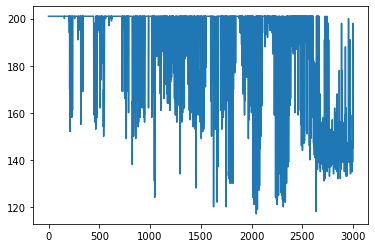

In [4]:
# print rewards
# print Q_table
plt.plot(timesteps)
plt.show()

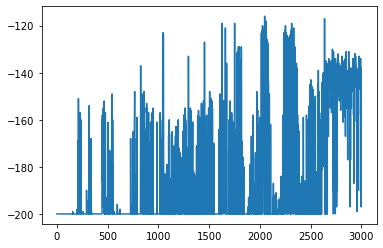

In [5]:
plt.plot(scores)
plt.show()

In [6]:
max_score

-116.0

In [7]:
np.mean(scores)

-184.355